<a href="https://www.kaggle.com/code/ellekayem/data-visualization-with-halloween-candies?scriptVersionId=128368022" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Visualization with Halloween Candies

### Analysis by Lauren Main

### Feature Tasks Version 1.0

Using two datasets load and analyze the data.

Summarize your insights. 

Visualize your insights with at least two illustrations per set. 

Table of Contents: 

* [First Look at the Glue Data](#section-one)
* [Note on the Encoders](#section-two)
* [Note on the Models](#section-three)
* [First Conclusions](#section-four)
* [How Do Different Models Score on Tasks? ](#section-five)
* [How are the Scores Improving Over Time? ](#section-six)
* [Final Conclusions](#section-seven)


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_candy = pd.read_csv('../input/the-ultimate-halloween-candy-power-ranking/candy-data.csv')
df_candy['competitorname'] = df_candy['competitorname'].apply(lambda x: re.sub(r'[^\x00-\x7F]+','', x))
df_candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welchs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werthers Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


## First Look at the Data

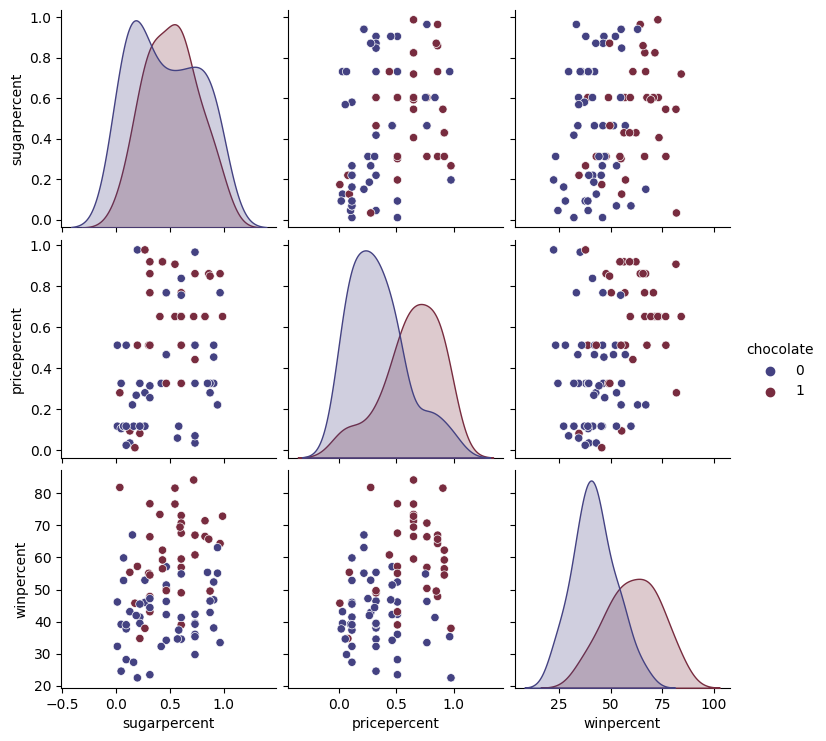

In [3]:
columns = ['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 
           'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 
           'pricepercent', 'winpercent']


# Create a pairplot
sns.pairplot(data=df_candy, vars=['sugarpercent', 'pricepercent', 'winpercent'], 
             hue='chocolate', diag_kind='kde', palette='icefire')

# Show the plot
plt.show()

## Additional Analysis

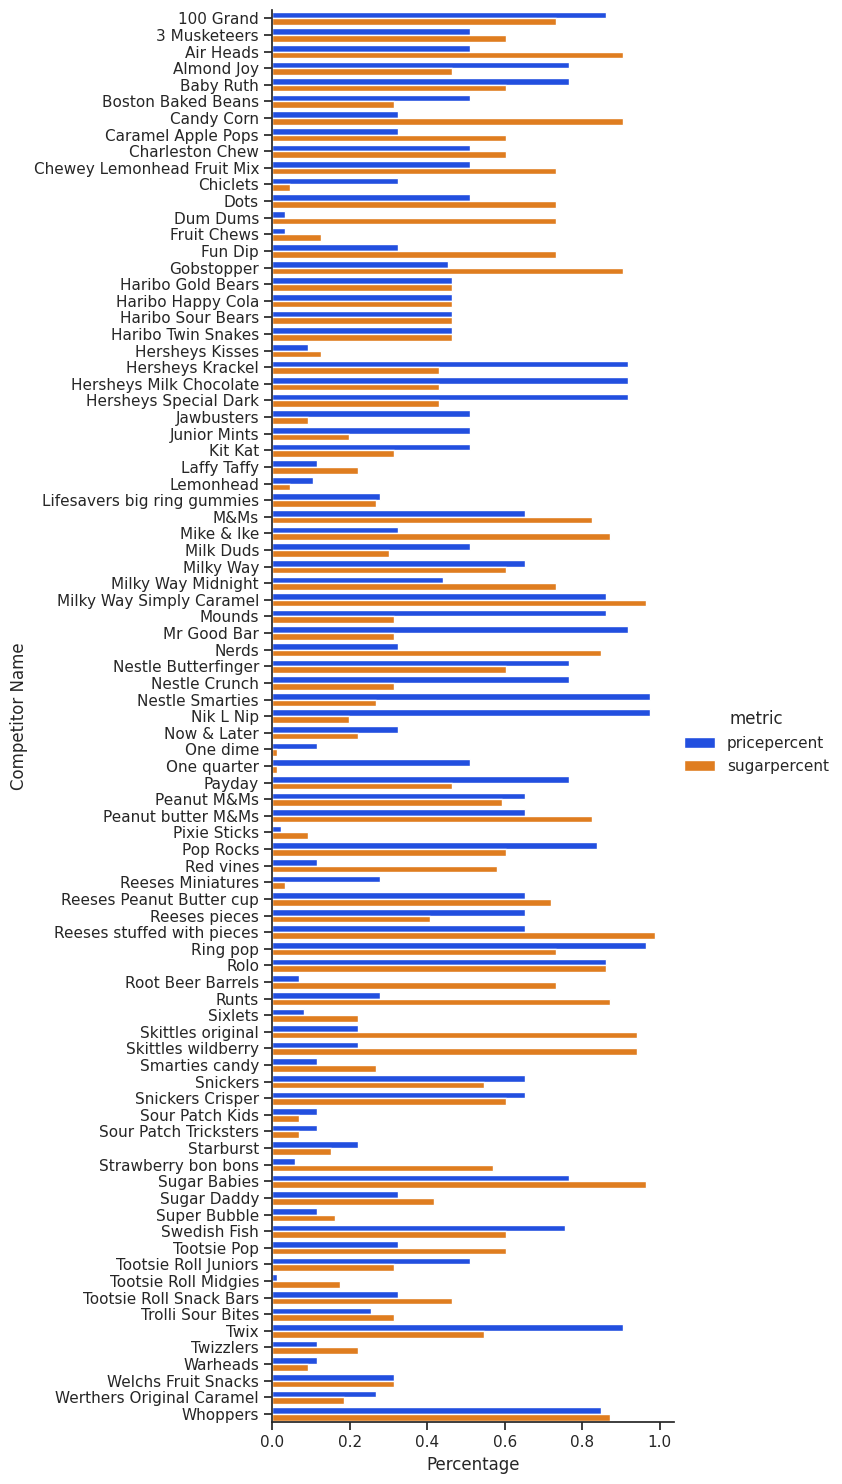

In [4]:
sns.set_theme(style="ticks", palette="bright")


df_mean = df_candy.groupby('competitorname')[['pricepercent', 'sugarpercent']].mean().reset_index()

# Melt the DataFrame to long format
df_mean_melt = pd.melt(df_mean, id_vars='competitorname', var_name='metric', value_name='value')

# Create a horizontal bar plot with competitorname on the x-axis and value on the y-axis
g = sns.catplot(x="value", y="competitorname", hue="metric", kind="bar", data=df_mean_melt, height=15, aspect=0.5)

g.set_xlabels("Percentage")
g.set_ylabels("Competitor Name")
plt.show()

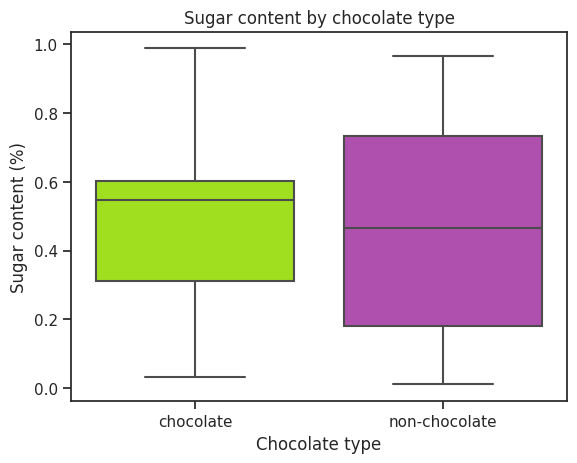

In [5]:
# Set custom colors
colors = ['#AAFF00', '#BF40BF']

# Create a new column indicating whether each candy is chocolate-based or not
df_candy['is_chocolate'] = df_candy['chocolate'].apply(lambda x: 'chocolate' if x == 1 else 'non-chocolate')

# Create a box plot to show the distribution of sugar content for chocolate-based vs. non-chocolate-based candies
sns.boxplot(x='is_chocolate', y='sugarpercent', data=df_candy, palette=colors)
plt.title('Sugar content by chocolate type')
plt.xlabel('Chocolate type')
plt.ylabel('Sugar content (%)')
plt.show()

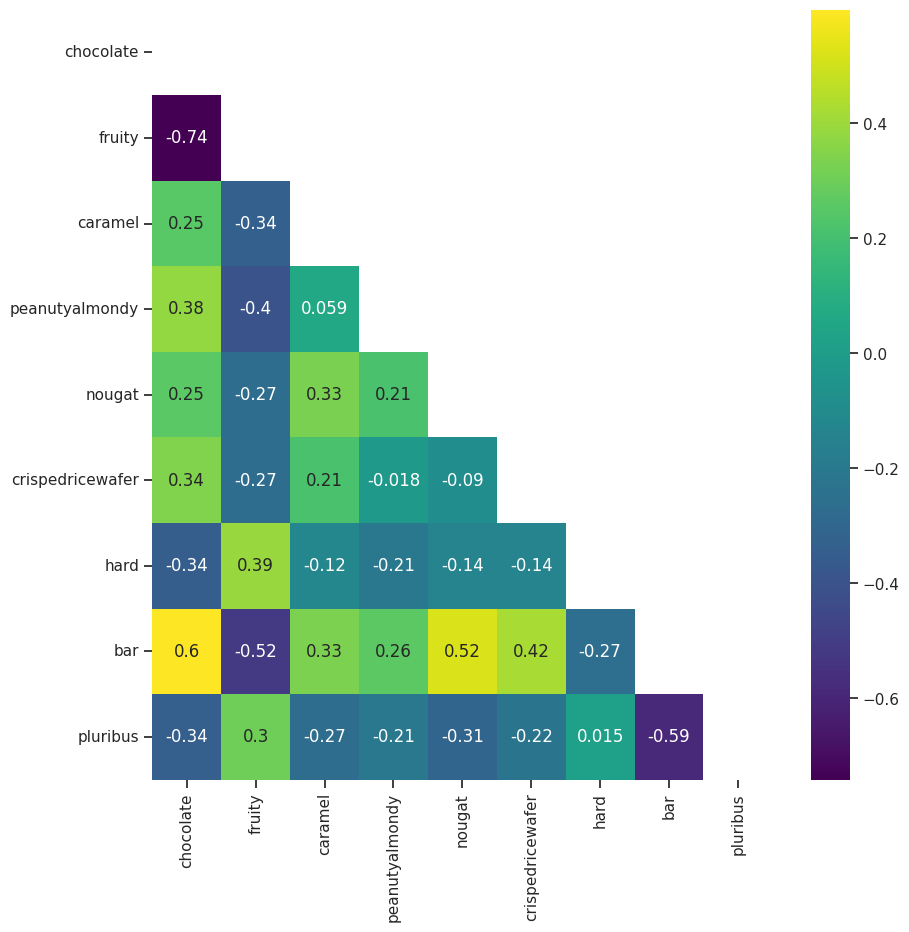

In [6]:
#I only want to look at candy flavors, so I need to exclude a few values from the df.
exclude_cols = ['winpercent', 'sugarpercent', 'pricepercent']

#create a new df
corr_df = df_candy.drop(exclude_cols, axis=1)

correlation_matrix = corr_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10,10))
#set the mask parameter to true so that I can remove redundant information
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis', mask=np.triu(correlation_matrix), ax=ax)
plt.show()

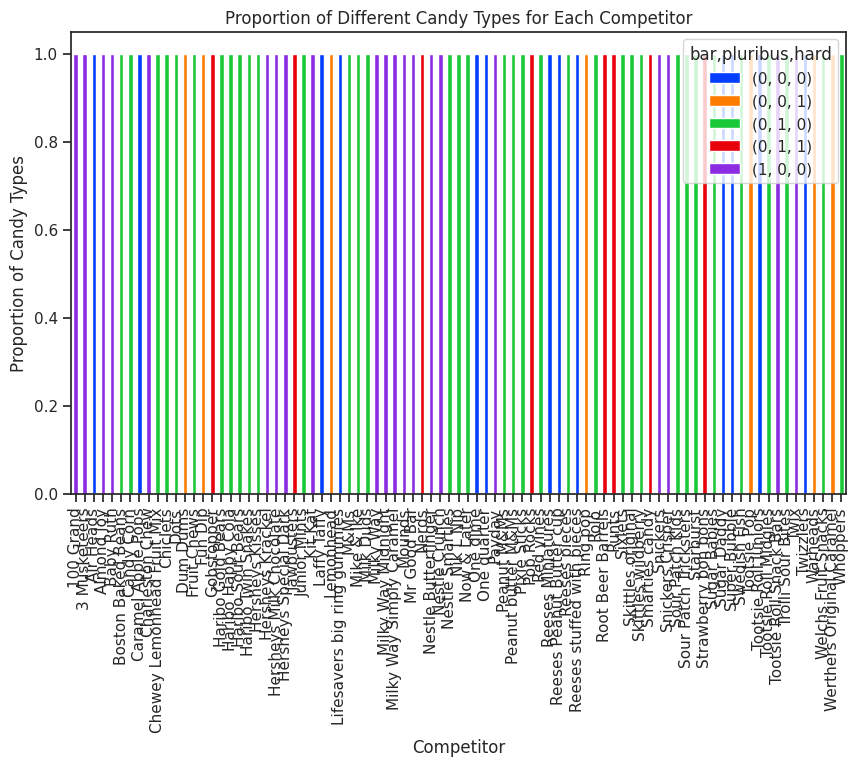

In [7]:
# group the data by competitor and candy type, and count the number of occurrences of each type
df_counts = df_candy.groupby(['competitorname', 'bar', 'pluribus', 'hard'])['competitorname'].count().reset_index(name='count')

# reshape the data so that each type of candy is in its own column
df_counts_pivot = df_counts.pivot_table(index='competitorname', columns=['bar', 'pluribus', 'hard'], values='count')

# plot the stacked bar chart
df_counts_pivot.plot(kind='bar', stacked=True, figsize=(10,6))

# set the x and y axis labels and plot title
plt.xlabel('Competitor')
plt.ylabel('Proportion of Candy Types')
plt.title('Proportion of Different Candy Types for Each Competitor')

# display the plot
plt.show()